In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Lets get graphing

In [3]:
denoised_info_root = "./finished/gauss"
og_and_noised_root = "./noised_images_data/gauss"
end_folder = "./bar_graphs/gauss"

In [ ]:
os.makedirs(end_folder, exist_ok=True)

files = os.listdir(denoised_info_root)
for file in files:
    print(file)
    subfolder = os.path.join(denoised_info_root, file)
    if os.path.isdir(subfolder):
        subfiles = os.listdir(subfolder)
        for subfile in subfiles:
            subfolder2 = os.path.join(subfolder, subfile)
            if os.path.isdir(subfolder2):
                subfiles2 = os.listdir(subfolder2)
                for subfile2 in subfiles2:
                    if subfile2.endswith('.csv'):
                        csv_path = os.path.join(subfolder2, subfile2)
                        df = pd.read_csv(csv_path)
                        
                        # Create one figure with subplots for all columns
                        n_cols = len(df.columns[1:])
                        fig, axes = plt.subplots(nrows=(n_cols + 1) // 2, ncols=2, figsize=(15, 5 * ((n_cols + 1) // 2)))
                        axes = axes.flatten()
                        
                        for idx, col in enumerate(df.columns[1:]):
                            ax = axes[idx]
                            
                            if pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_bool_dtype(df[col]):
                                ax.hist(df[col], bins=20, edgecolor='black')
                                mean_val = df[col].mean()
                                median_val = df[col].median()
                                ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
                                ax.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
                                ax.legend()
                            elif pd.api.types.is_bool_dtype(df[col]):
                                value_counts = df[col].value_counts()
                                ax.bar([str(x) for x in value_counts.index], value_counts.values)
                            
                            ax.set_title(col)
                            ax.set_xlabel(col)
                            ax.set_ylabel('Frequency')
                        
                        # Hide unused subplots
                        for idx in range(len(df.columns[1:]), len(axes)):
                            axes[idx].set_visible(False)
                        
                        plt.suptitle(f"{subfile2[16:-4]} - All Metrics")
                        plt.tight_layout()
                        save_name = f"{subfile2[16:-4]}.png"
                        if "c" in file:
                            same_name = f"c+{save_name}"
                        save_path = os.path.join(end_folder, save_name)
                        if os.path.exists(save_path):
                            os.remove(save_path)
                        plt.savefig(save_path, dpi=300)
                        plt.close()

NameError: name 'os' is not defined

Noisy_N(0,100)_Photo_Data_BW.csv
Noisy_N(10,50)_Photo_Data.csv
Noisy_N(10,25)_Photo_Data.csv
Noisy_N(0,25)_Photo_Data_BW.csv
Noisy_N(10,150)_Photo_Data_BW.csv
Noisy_N(0,150)_Photo_Data.csv
Noisy_N(-10,25)_Photo_Data.csv
Noisy_N(0,150)_Photo_Data_BW.csv
Original_Photo_Data.csv
Noisy_N(10,25)_Photo_Data_BW.csv
Noisy_N(10,100)_Photo_Data_BW.csv
Noisy_N(-10,50)_Photo_Data.csv
Noisy_N(10,50)_Photo_Data_BW.csv
Noisy_N(0,50)_Photo_Data_BW.csv
BW_Photo_Data.csv
Noisy_N(0,100)_Photo_Data.csv
Noisy_N(-10,150)_Photo_Data.csv
Noisy_N(0,50)_Photo_Data.csv
Noisy_N(-10,50)_Photo_Data_BW.csv
Noisy_N(0,25)_Photo_Data.csv
Noisy_N(10,150)_Photo_Data.csv
Noisy_N(10,100)_Photo_Data.csv
Noisy_N(-10,100)_Photo_Data_BW.csv
Noisy_N(-10,25)_Photo_Data_BW.csv
Noisy_N(-10,150)_Photo_Data_BW.csv
Noisy_N(-10,100)_Photo_Data.csv


KeyboardInterrupt: 

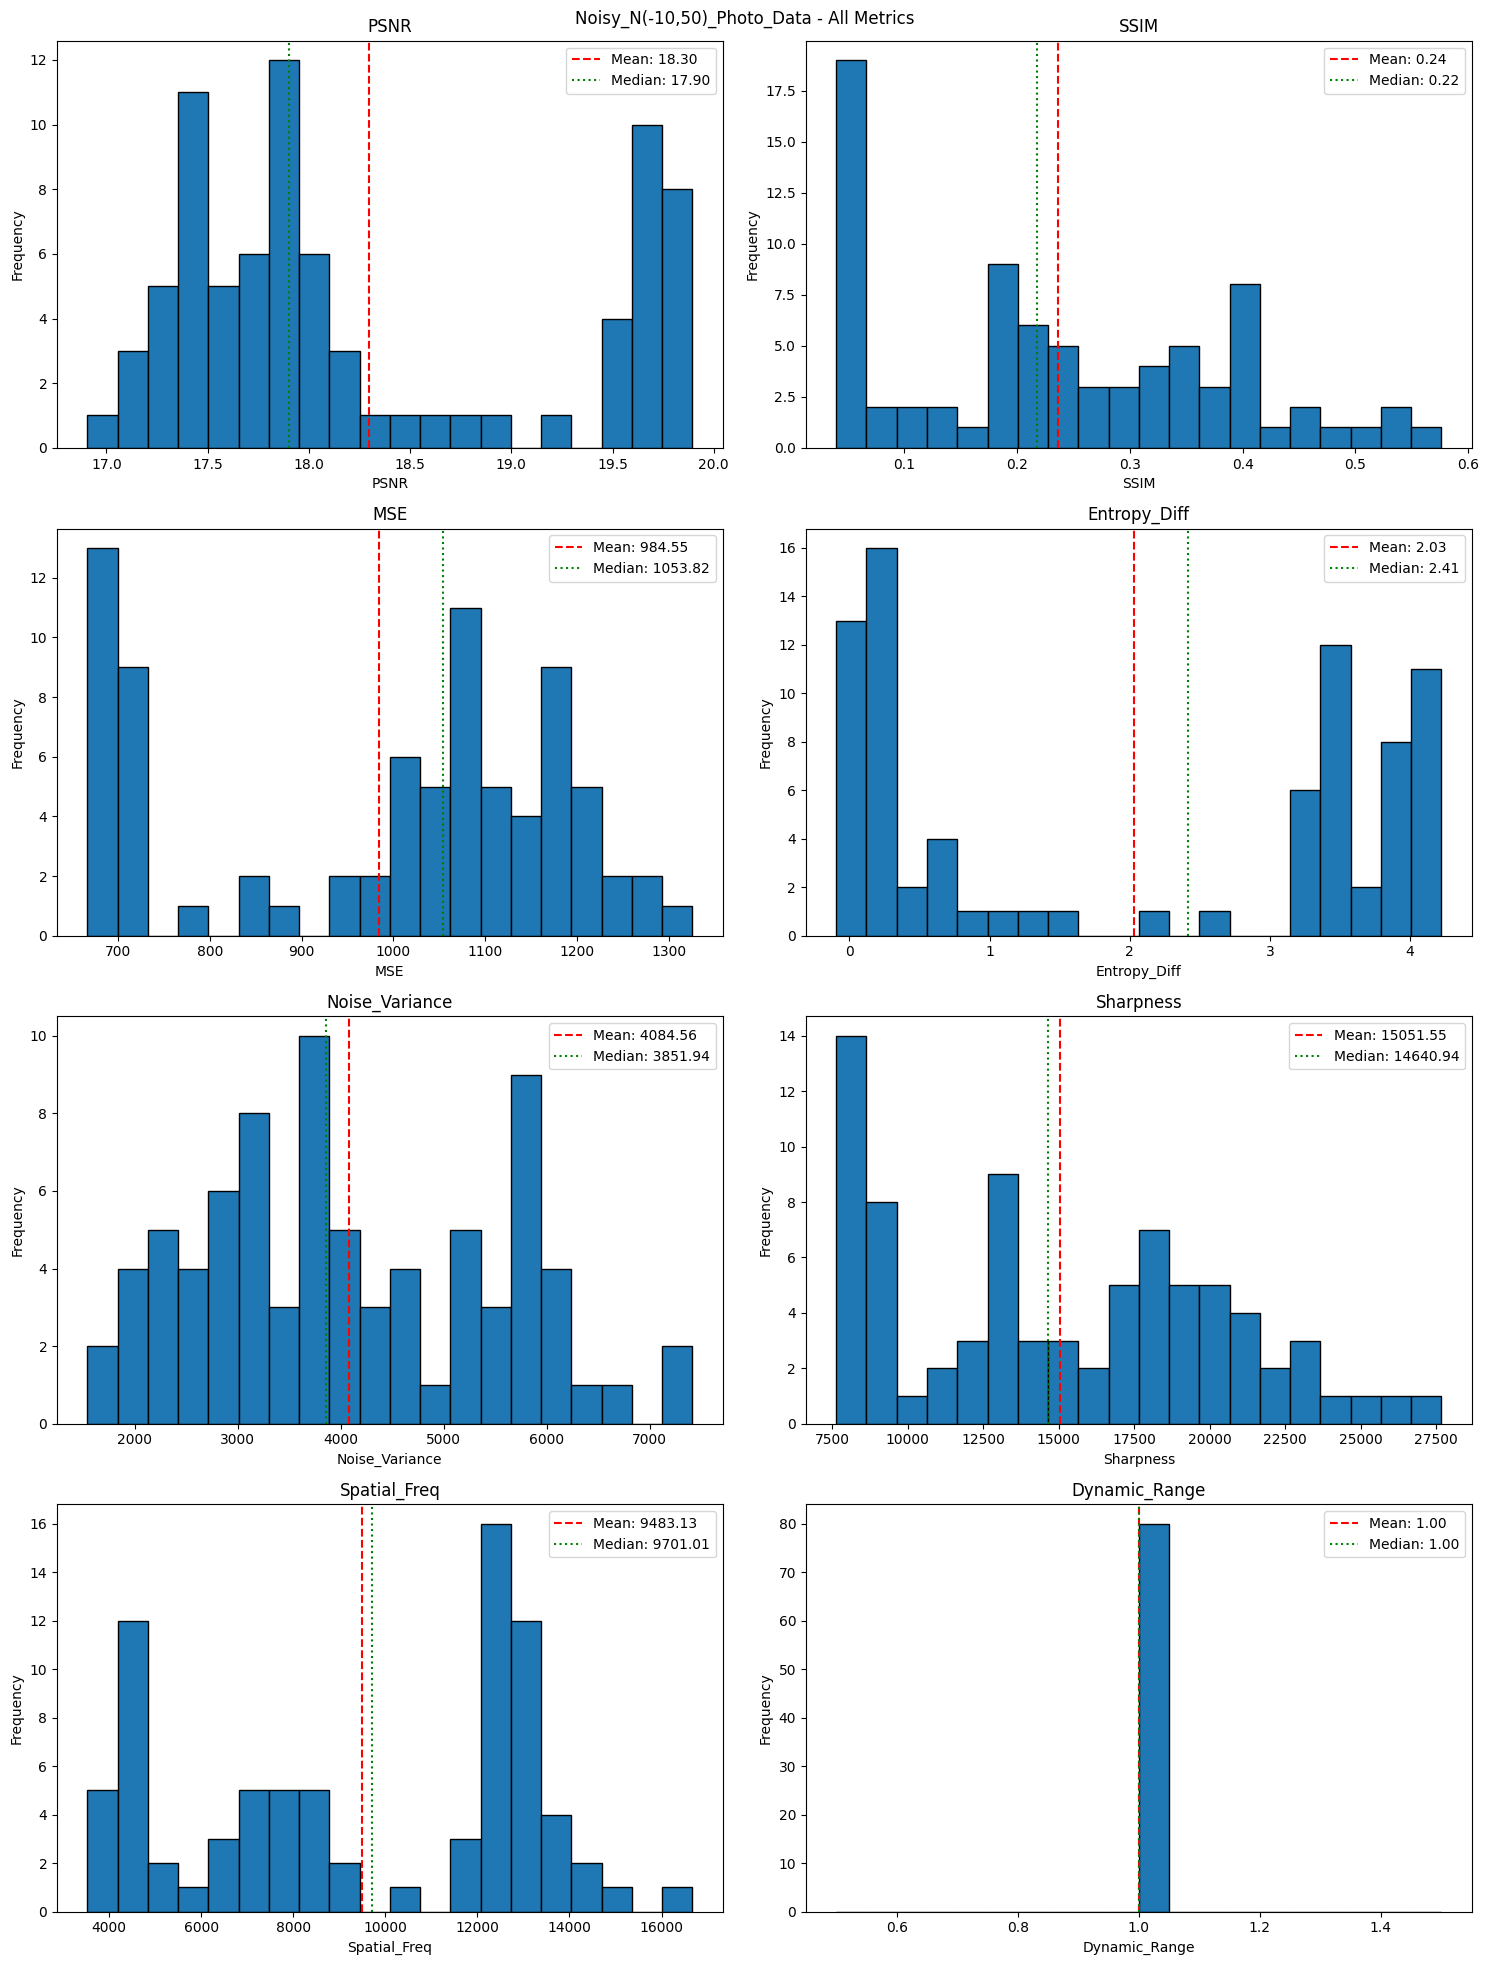

In [ ]:
os.makedirs(end_folder, exist_ok=True)

csv_files = []
for root, dirs, files in os.walk(og_and_noised_root):
    for file in files:
        print(file)
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

for csv_path in csv_files:
    df = pd.read_csv(csv_path)
    csv_name = os.path.basename(csv_path)[:-4]
    
    n_cols = len(df.columns[1:])
    fig, axes = plt.subplots(nrows=(n_cols + 1) // 2, ncols=2, figsize=(15, 5 * ((n_cols + 1) // 2)))
    axes = axes.flatten()
    
    for idx, col in enumerate(df.columns[1:]):
        ax = axes[idx]
        
        if pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_bool_dtype(df[col]):
            ax.hist(df[col], bins=20, edgecolor='black')
            mean_val = df[col].mean()
            median_val = df[col].median()
            ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
            ax.legend()
        elif pd.api.types.is_bool_dtype(df[col]):
            value_counts = df[col].value_counts()
            ax.bar([str(x) for x in value_counts.index], value_counts.values)
        
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    
    for idx in range(len(df.columns[1:]), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f"{csv_name} - All Metrics")
    plt.tight_layout()
    if csv_name[0] == "B":
        csv_name = "BW_DATA"
    elif csv_name[0] == "O":
        csv_name = "OG_DATA"
    elif(csv_name[-2:] == "BW"):
        csv_name = csv_name[6:-4]
        csv_name = "BW_" + csv_name[:-10]
    else:
        csv_name = csv_name[6:-4]
        csv_name = csv_name[:-10]
    save_name = f"{csv_name}"
    save_path = os.path.join(end_folder, save_name)
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path, dpi=300)
    plt.close()